In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
weather = pd.read_csv('./weather.csv')

In [3]:
weather

,Local time in Jeju (airport),T,WW
0,2020-11-01 1:00,14.3,NaN
1,2020-11-01 2:00,14.6,NaN
2,2020-11-01 3:00,14.7,NaN
3,2020-11-01 4:00,14.5,NaN
4,2020-11-01 5:00,14.6,NaN
...,...,...,...
20537,2021-06-02 20:00,22.0,NaN
20538,2021-06-02 21:00,22.0,NaN
20539,2021-06-02 22:00,22.1,NaN
20540,2021-06-02 23:00,22.6,NaN


In [4]:
weather['Local time in Jeju (airport)'] = pd.to_datetime(weather['Local time in Jeju (airport)'], format='%Y-%m-%d %H:%M', errors='raise')
weather['Date'] = weather['Local time in Jeju (airport)'].dt.date
weather['WW'][weather['WW'].notnull()] = 1
weather['WW'][weather['WW'].isnull()] = 0
weather['WW'] = pd.to_numeric(weather['WW'])


C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mllab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
temp_rain = weather.groupby('Date',as_index=False).mean()
temp_rain.rename(columns={'WW':'rain'},inplace=True)
temp_rain['Date'] = temp_rain['Date'].astype(str)

In [6]:
temp_rain

,Date,T,rain
0,2020-11-01,17.559783,0.010870
1,2020-11-02,15.604167,0.208333
2,2020-11-03,13.206250,0.010417
3,2020-11-04,11.852083,0.000000
4,2020-11-05,13.968750,0.000000
...,...,...,...
210,2021-05-30,20.061458,0.000000
211,2021-05-31,20.938542,0.000000
212,2021-06-01,21.856250,0.000000
213,2021-06-02,22.740625,0.000000


In [7]:
weather

,Local time in Jeju (airport),T,WW,Date
0,2020-11-01 01:00:00,14.3,0.0,2020-11-01
1,2020-11-01 02:00:00,14.6,0.0,2020-11-01
2,2020-11-01 03:00:00,14.7,0.0,2020-11-01
3,2020-11-01 04:00:00,14.5,0.0,2020-11-01
4,2020-11-01 05:00:00,14.6,0.0,2020-11-01
...,...,...,...,...
20537,2021-06-02 20:00:00,22.0,0.0,2021-06-02
20538,2021-06-02 21:00:00,22.0,0.0,2021-06-02
20539,2021-06-02 22:00:00,22.1,0.0,2021-06-02
20540,2021-06-02 23:00:00,22.6,0.0,2021-06-02


In [7]:
data = pd.read_csv('./data.csv')
data.drop(['year','month'],axis=1,inplace=True)

In [8]:
place = pd.read_csv('station.csv', encoding='euc-kr') #길거리에 Iot 있는 킥보드가 있는 장소

In [9]:
data['Xpos'] = None
data['Ypos']= None

#위치 추가
for i in range(len(data)):
    for j in range(len(place)):
        if(data['rent_station'].iloc[i] == place['id'].iloc[j]):
            data['Xpos'].iloc[i] = float(round(place['x_pos'].iloc[j],3))
            data['Ypos'].iloc[i] = float(round(place['y_pos'].iloc[j],3))

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
data['Xpos'] = data['Xpos'].astype('float')
data['Ypos'] = data['Ypos'].astype('float')

In [11]:
#data = data.iloc[:4718] #10월 8일 이후 데이터 자르기위함

## 지역 여러개 데이터 분할

In [12]:
data['Sector'] = 0
NineSector_data = data.copy()
TwoSector_data = data.copy()
OneSector_data = data.copy()
FourSector_data = data.copy()

# ========================================================

In [13]:
def preprocessing(data):
    data['rent_date'] = pd.to_datetime(data['rent_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    data['year'] =data['rent_date'].dt.year
    data['month'] =data['rent_date'].dt.month
    data['day'] =data['rent_date'].dt.day
    data['day_name'] = data['rent_date'].dt.day_name()
    data = data.sort_values(by='rent_date')
    data['rent_date'] = data['rent_date'].astype(str)
    data['T'] = None
    data['rain'] = None
    return data

In [14]:
def temp_rain_preprocessing(data,length,temp_length):
    for i in range(temp_length):
        for j in range(length):
            if(data['rent_date'].iloc[j] == temp_rain['Date'].iloc[i]):
                data['T'].iloc[j] = temp_rain['T'].iloc[i]
                data['rain'].iloc[j] = temp_rain['rain'].iloc[i]
                if(data['rain'].iloc[j]>0):
                    data['rain'].iloc[j] = 0
                else:
                    data['rain'].iloc[j] = 1
    data['T'] = data['T'].astype(int)
    data['rent_date']=pd.to_datetime(data['rent_date'])
    return data

In [15]:
def weekend_weekday_preprocessing(data,length):
    data['weekend'] = None
    for i in range(length):
        if(('Friday' == data['day_name'].iloc[i]) or ('Saturday'== data['day_name'].iloc[i]) or ('Sunday' == data['day_name'].iloc[i])):
            data['weekend'].iloc[i] = 1
        else:
            data['weekend'].iloc[i] = 0

    data['weekend']=data['weekend'].astype(int)
    return data

In [16]:
def dummy_preprocessing(data):
    data['weekday'] = data['rent_date'].dt.weekday
    data = pd.get_dummies(data,columns=['weekday'])
    data = pd.get_dummies(data,columns=['month'])
    data = pd.get_dummies(data,columns=['year'])
    return data

In [17]:
def WholePreprocessing(data):
    data = data.groupby(['rent_date','Sector'],as_index=False).sum()
    length = len(data)
    temp_length = len(temp_rain)
    data = preprocessing(data)
    data = temp_rain_preprocessing(data,length,temp_length)
    data = weekend_weekday_preprocessing(data,length)
    data = dummy_preprocessing(data)
    data.drop(['day_name','Xpos','Ypos'],axis=1,inplace=True)
    return data

# 지역 한개 모델

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import lightgbm as lgb
from catboost import CatBoostRegressor

In [19]:
OneSector_data

,rent_date,rent_station,rent_number,day,day_name,Xpos,Ypos,Sector
0,2020-11-01,EVS_000213,1,1,Sunday,33.499,126.530,0
1,2020-11-01,EVS_000278,1,1,Sunday,33.510,126.523,0
2,2020-11-01,EVS_000190,2,1,Sunday,33.467,126.337,0
3,2020-11-01,EVS_000219,4,1,Sunday,33.507,126.494,0
4,2020-11-01,EVS_000137,2,1,Sunday,33.485,126.480,0
...,...,...,...,...,...,...,...,...
6515,2021-06-03,EVS_000108,1,3,Tuesday,33.245,126.574,0
6516,2021-06-03,EVS_000110,1,3,Tuesday,33.482,126.482,0
6517,2021-06-03,EVS_000359,1,3,Tuesday,33.445,126.919,0
6518,2021-06-03,EVS_000285,1,3,Tuesday,33.476,126.550,0


In [20]:
def model_training(data,test_size):
    X_data = data.drop(['rent_date','rent_number'],axis=1)
    y_data = data['rent_number']
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=test_size,random_state=13)
    xlf = xgb.XGBRegressor()
    xlf.fit(X_train, y_train)
    return xlf, X_train,X_test,y_train,y_test

In [21]:
def PrintResult(y_test,xlf,X_test):

    original_y_test_index=y_test.index
    y_test.index = range(len(y_test)) 
    xgb_preds = xlf.predict(X_test)
    xgb_preds = xgb_preds.astype(int)
    print('RMSE: ', sqrt(mean_squared_error(y_test,xgb_preds)))
    print("R2 SCORE", round(r2_score(y_test, xgb_preds), 2))
    return original_y_test_index,xgb_preds

In [22]:
def Plot(xgb_preds,y_test):

    fig, axes = plt.subplots(1,1,figsize=(8,4))
    axes.plot(xgb_preds,'r',label='predictions_value')
    axes.plot(y_test,label='real_value')
    axes.set_xlabel('dataset')
    axes.set_ylabel('rent_number')
    plt.tight_layout()
    axes.legend()
    plt.show()


In [23]:
def AddError(X_test,xgb_preds,y_test,original_y_test_index):
    minus=xgb_preds-y_test
    minus.index = original_y_test_index
    y_test.index = original_y_test_index
    X_test['Minus'] = minus
    X_test['rent_number'] = y_test
    X_test['rent_date'] = None
    return X_test

In [24]:
def Scatter(data):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='Ypos',y ='Xpos',hue='Sector',data=data,s=500)

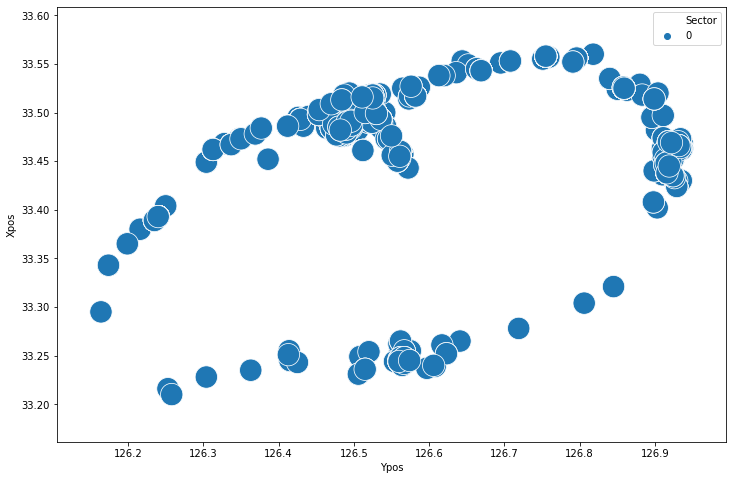

In [25]:
Scatter(OneSector_data)

In [26]:
OneSector_data = OneSector_data.groupby(['rent_date','Sector'],as_index=False).sum()
OneSector_data = WholePreprocessing(OneSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


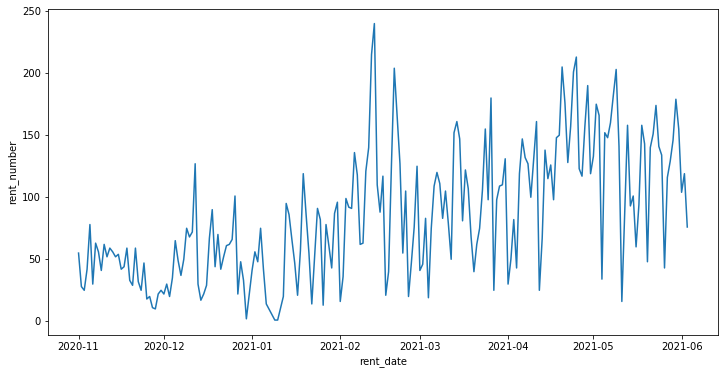

In [27]:
plt.figure(figsize=(12,6))

plt.plot(OneSector_data['rent_date'],OneSector_data['rent_number'])
plt.xlabel('rent_date')
plt.ylabel('rent_number')

plt.show()

In [28]:
OneSector_data

,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_1,month_2,month_3,month_4,month_5,month_6,month_11,month_12,year_2020,year_2021
0,2020-11-01,0,55,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2020-11-02,0,28,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2020-11-03,0,25,3,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,2020-11-04,0,42,4,11,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,2020-11-05,0,78,5,13,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2021-05-30,0,179,30,20,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206,2021-05-31,0,155,31,20,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
207,2021-06-01,0,104,1,21,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
208,2021-06-02,0,119,2,22,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [29]:
OneSector_data['rain'] = OneSector_data['rain'].astype(str).astype(int)

In [30]:
xlf,X_train,X_test,y_train,y_test = model_training(OneSector_data,0.2)

In [31]:
original_y_test_index,xgb_preds = PrintResult(y_test,xlf,X_test)

RMSE:  32.37981440577418
R2 SCORE 0.53


In [32]:
def mean_absolute_percentage_error(y_test, xgb_preds): 
    y_test, xgb_preds = np.array(y_test), np.array(xgb_preds)
    return np.mean(np.abs((y_test - xgb_preds) / y_test)) * 100
print(mean_absolute_percentage_error(y_test, xgb_preds))

52.1526884037491


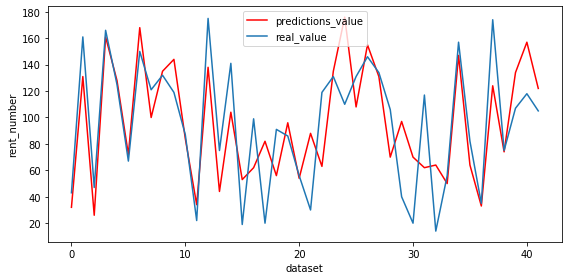

In [33]:
Plot(xgb_preds,y_test)

## Error 추가

In [34]:
One_data_with_error = AddError(X_test,xgb_preds,y_test,original_y_test_index) 

In [35]:
xlf,X_train,X_test,y_train,y_test = model_training(One_data_with_error,0.2)

In [36]:
original_y_test_index,xgb_preds2 = PrintResult(y_test,xlf,X_test)

RMSE:  37.38538038681253
R2 SCORE 0.67


In [37]:
One_data_with_error

,Sector,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,...,month_4,month_5,month_6,month_11,month_12,year_2020,year_2021,Minus,rent_number,rent_date
84,0,29,2,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,-11,43,None
128,0,14,11,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,-30,161,None
23,0,24,10,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,-21,47,None
107,0,21,16,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,-5,166,None
114,0,28,13,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,3,125,None
158,0,13,12,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,5,67,None
164,0,19,14,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,18,150,None
96,0,10,7,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,-21,121,None
152,0,7,14,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,3,132,None
208,0,2,22,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,25,119,None


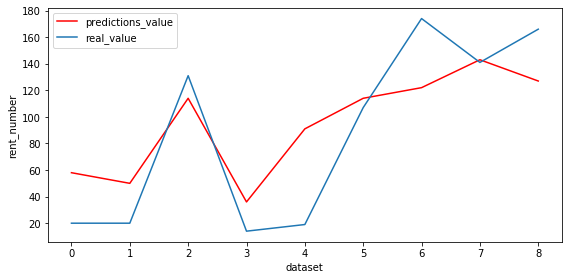

In [38]:
Plot(xgb_preds2,y_test)

# 지역 두개

In [39]:
TwoSector_data

,rent_date,rent_station,rent_number,day,day_name,Xpos,Ypos,Sector
0,2020-11-01,EVS_000213,1,1,Sunday,33.499,126.530,0
1,2020-11-01,EVS_000278,1,1,Sunday,33.510,126.523,0
2,2020-11-01,EVS_000190,2,1,Sunday,33.467,126.337,0
3,2020-11-01,EVS_000219,4,1,Sunday,33.507,126.494,0
4,2020-11-01,EVS_000137,2,1,Sunday,33.485,126.480,0
...,...,...,...,...,...,...,...,...
6515,2021-06-03,EVS_000108,1,3,Tuesday,33.245,126.574,0
6516,2021-06-03,EVS_000110,1,3,Tuesday,33.482,126.482,0
6517,2021-06-03,EVS_000359,1,3,Tuesday,33.445,126.919,0
6518,2021-06-03,EVS_000285,1,3,Tuesday,33.476,126.550,0


In [40]:
for i in range(len(TwoSector_data)):
    if((TwoSector_data['Ypos'].iloc[i] >126.58)):
        TwoSector_data['Sector'].iloc[i] = 0
    else:
        TwoSector_data['Sector'].iloc[i] = 1

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


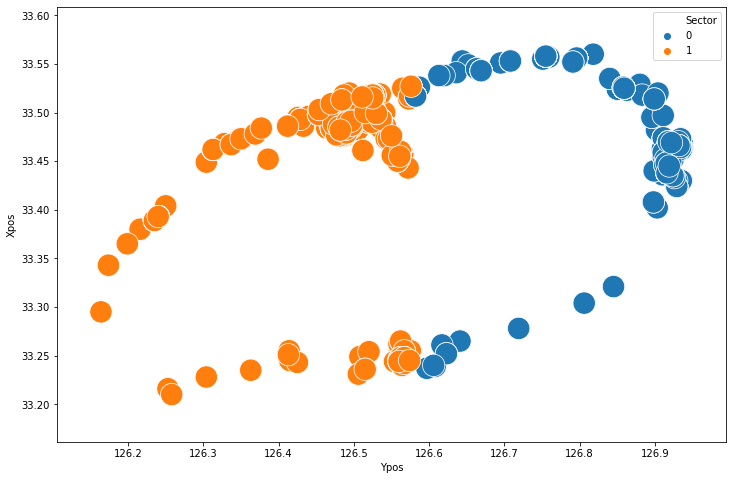

In [41]:
Scatter(TwoSector_data)

In [42]:
TwoSector_data = WholePreprocessing(TwoSector_data)
TwoSector_data

,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_1,month_2,month_3,month_4,month_5,month_6,month_11,month_12,year_2020,year_2021
0,2020-11-01,0,3,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2020-11-01,1,52,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2020-11-02,0,8,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2020-11-02,1,20,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2020-11-03,0,4,3,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2021-06-01,1,68,1,21,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
400,2021-06-02,0,33,2,22,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
401,2021-06-02,1,86,2,22,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
402,2021-06-03,0,16,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [43]:
TwoSector_data['rain'] = TwoSector_data['rain'].astype(str).astype(int)

In [44]:
Two_xlf,Two_X_train,Two_X_test,Two_y_train,Two_y_test = model_training(TwoSector_data,0.2)
original_y_test_index,Two_xgb_preds = PrintResult(Two_y_test,Two_xlf,Two_X_test)

RMSE:  20.288657659629177
R2 SCORE 0.72


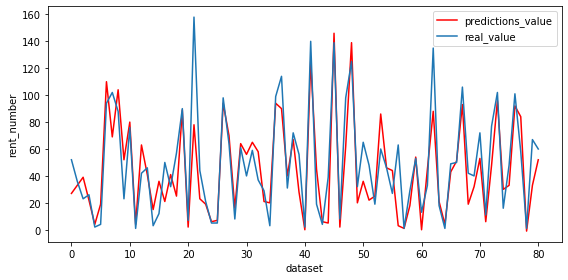

In [45]:
Plot(Two_xgb_preds,Two_y_test)

## Error 추가

In [46]:
Two_data_with_error = AddError(Two_X_test,Two_xgb_preds,Two_y_test,original_y_test_index)

In [47]:
Two_xlf,Two_X_train,Two_X_test,Two_y_train,Two_y_test = model_training(Two_data_with_error,0.2)

In [48]:
original_y_test_index,Two_xgb_preds=PrintResult(Two_y_test,Two_xlf,Two_X_test)

RMSE:  19.369472646105656
R2 SCORE 0.76


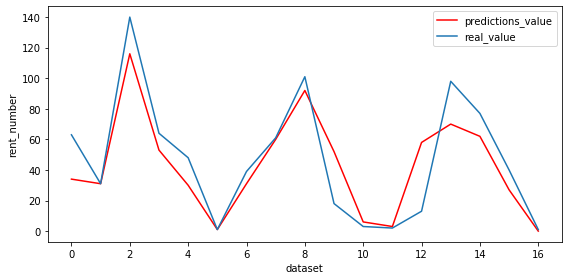

In [49]:
Plot(Two_xgb_preds,Two_y_test)

# 지역 4개

In [50]:
FourSector_data

,rent_date,rent_station,rent_number,day,day_name,Xpos,Ypos,Sector
0,2020-11-01,EVS_000213,1,1,Sunday,33.499,126.530,0
1,2020-11-01,EVS_000278,1,1,Sunday,33.510,126.523,0
2,2020-11-01,EVS_000190,2,1,Sunday,33.467,126.337,0
3,2020-11-01,EVS_000219,4,1,Sunday,33.507,126.494,0
4,2020-11-01,EVS_000137,2,1,Sunday,33.485,126.480,0
...,...,...,...,...,...,...,...,...
6515,2021-06-03,EVS_000108,1,3,Tuesday,33.245,126.574,0
6516,2021-06-03,EVS_000110,1,3,Tuesday,33.482,126.482,0
6517,2021-06-03,EVS_000359,1,3,Tuesday,33.445,126.919,0
6518,2021-06-03,EVS_000285,1,3,Tuesday,33.476,126.550,0


In [51]:
for i in range(len(FourSector_data)):
    if((FourSector_data['Ypos'].iloc[i] <126.4) and (FourSector_data['Xpos'].iloc[i]>33.33)):
        FourSector_data['Sector'].iloc[i] = 0
    elif((FourSector_data['Ypos'].iloc[i] >126.4) and (FourSector_data['Ypos'].iloc[i] <126.6) and (FourSector_data['Xpos'].iloc[i]>33.33)):
        FourSector_data['Sector'].iloc[i] = 1
    elif((FourSector_data['Ypos'].iloc[i] >=126.6) and (FourSector_data['Xpos'].iloc[i]>33.33)):
        FourSector_data['Sector'].iloc[i] = 2
    elif(FourSector_data['Xpos'].iloc[i]<=33.33):
        FourSector_data['Sector'].iloc[i] = 3


C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


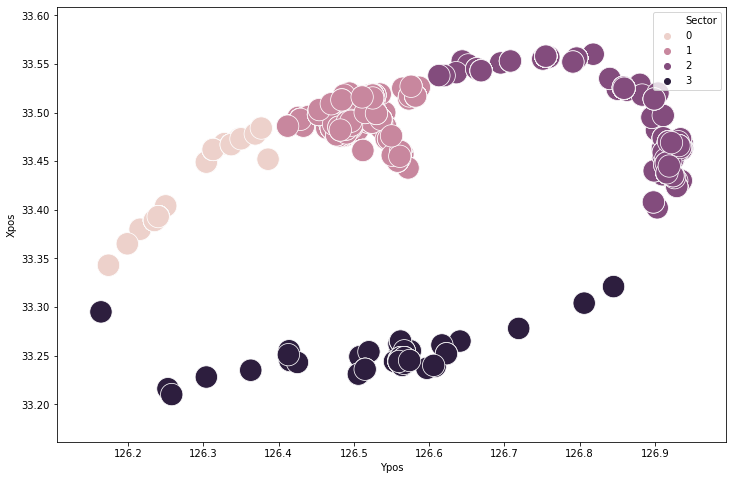

In [52]:
Scatter(FourSector_data)

In [53]:
FourSector_data = WholePreprocessing(FourSector_data)
FourSector_data

,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_1,month_2,month_3,month_4,month_5,month_6,month_11,month_12,year_2020,year_2021
0,2020-11-01,0,16,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2020-11-01,1,36,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2020-11-01,2,3,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2020-11-02,0,7,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2020-11-02,1,13,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,2021-06-02,1,44,2,22,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
654,2021-06-03,1,36,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
655,2021-06-03,2,16,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
653,2021-06-03,0,13,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [54]:
FourSector_data['rain'] = FourSector_data['rain'].astype(str).astype(int)

In [55]:
Four_xlf,Four_X_train,Four_X_test,Four_y_train,Four_y_test = model_training(FourSector_data,0.2)
original_y_test_index,Four_xgb_preds = PrintResult(Four_y_test,Four_xlf,Four_X_test)

RMSE:  16.037597870458825
R2 SCORE 0.57


In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mean_absolute_percentage_error(Four_y_test, Four_xgb_preds))

91.81928801147467


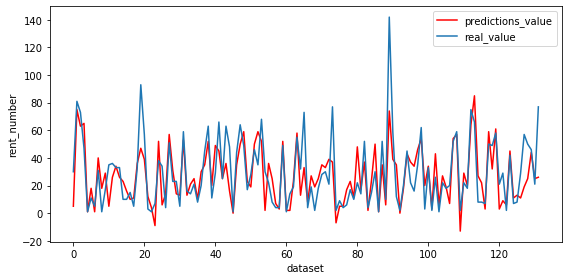

In [57]:
Plot(Four_xgb_preds,Four_y_test)


## Error 추가

In [58]:
Four_data_with_error=AddError(Four_X_test,Four_xgb_preds,Four_y_test,original_y_test_index)
Four_xlf,Four_X_train,Four_X_test,Four_y_train,Four_y_test = model_training(Four_data_with_error,0.2)
original_y_test_index,Four_xgb_preds = PrintResult(Four_y_test,Four_xlf,Four_X_test)

RMSE:  14.997530660943019
R2 SCORE 0.38


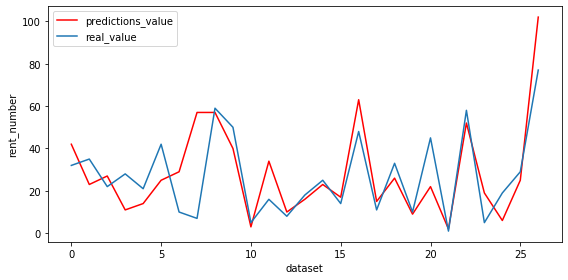

In [59]:
Plot(Four_xgb_preds,Four_y_test)


# 지역 9개

In [60]:
NineSector_data

,rent_date,rent_station,rent_number,day,day_name,Xpos,Ypos,Sector
0,2020-11-01,EVS_000213,1,1,Sunday,33.499,126.530,0
1,2020-11-01,EVS_000278,1,1,Sunday,33.510,126.523,0
2,2020-11-01,EVS_000190,2,1,Sunday,33.467,126.337,0
3,2020-11-01,EVS_000219,4,1,Sunday,33.507,126.494,0
4,2020-11-01,EVS_000137,2,1,Sunday,33.485,126.480,0
...,...,...,...,...,...,...,...,...
6515,2021-06-03,EVS_000108,1,3,Tuesday,33.245,126.574,0
6516,2021-06-03,EVS_000110,1,3,Tuesday,33.482,126.482,0
6517,2021-06-03,EVS_000359,1,3,Tuesday,33.445,126.919,0
6518,2021-06-03,EVS_000285,1,3,Tuesday,33.476,126.550,0


In [61]:
# 126.7<=a , 126.4<a <126.7, 126.4>=   를 나눌 수 있다. 경도 동서
# 33.3>= b, 33.3<b<33.45, 33.45<=b    로 나누자 위도 남북


In [62]:
def SeparateSector(data):
    for i in range(len(data)):
        if((data['Xpos'].iloc[i] <=33.30) and (data['Ypos'].iloc[i] >=126.7)):
            data['Sector'].iloc[i] = 0
        elif((data['Xpos'].iloc[i] >33.30) and (data['Xpos'].iloc[i] <33.45) and (data['Ypos'].iloc[i] >=126.7)):
            data['Sector'].iloc[i] = 1
        elif((data['Xpos'].iloc[i] >=33.45) and (data['Ypos'].iloc[i] >=126.7)):
            data['Sector'].iloc[i] = 2
        elif((data['Xpos'].iloc[i] <=33.30) and (data['Ypos'].iloc[i] >126.4) and (data['Ypos'].iloc[i] <126.7)):
            data['Sector'].iloc[i] = 3
        elif((data['Xpos'].iloc[i] >33.30) and (data['Xpos'].iloc[i] <33.45) and (data['Ypos'].iloc[i] >126.4) and (data['Ypos'].iloc[i] <126.7)):
            data['Sector'].iloc[i] = 4
        elif((data['Xpos'].iloc[i] >=33.45) and (data['Ypos'].iloc[i] >126.4) and (data['Ypos'].iloc[i] <126.7)):
            data['Sector'].iloc[i] = 5
        elif((data['Xpos'].iloc[i] <=33.30) and (data['Ypos'].iloc[i] <=126.4)):
            data['Sector'].iloc[i] = 6
        elif((data['Xpos'].iloc[i] >33.30) and (data['Xpos'].iloc[i] <33.45)  and (data['Ypos'].iloc[i] <=126.4)):
            data['Sector'].iloc[i] = 7
        elif((data['Xpos'].iloc[i] >33.45) and (data['Ypos'].iloc[i] <=126.4)):
            data['Sector'].iloc[i] = 8
    return data

In [63]:
NineSector_data['Sector'] = None
NineSector_data = SeparateSector(NineSector_data)

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
NineSector_data

,rent_date,rent_station,rent_number,day,day_name,Xpos,Ypos,Sector
0,2020-11-01,EVS_000213,1,1,Sunday,33.499,126.530,5
1,2020-11-01,EVS_000278,1,1,Sunday,33.510,126.523,5
2,2020-11-01,EVS_000190,2,1,Sunday,33.467,126.337,8
3,2020-11-01,EVS_000219,4,1,Sunday,33.507,126.494,5
4,2020-11-01,EVS_000137,2,1,Sunday,33.485,126.480,5
...,...,...,...,...,...,...,...,...
6515,2021-06-03,EVS_000108,1,3,Tuesday,33.245,126.574,3
6516,2021-06-03,EVS_000110,1,3,Tuesday,33.482,126.482,5
6517,2021-06-03,EVS_000359,1,3,Tuesday,33.445,126.919,1
6518,2021-06-03,EVS_000285,1,3,Tuesday,33.476,126.550,5


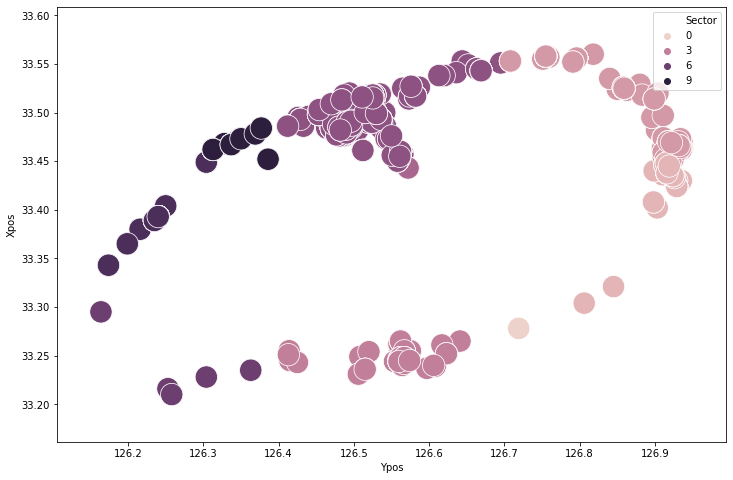

In [65]:
Scatter(NineSector_data)

In [66]:
NineSector_data = WholePreprocessing(NineSector_data)
NineSector_data

C:\Users\mllab\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,rent_date,Sector,rent_number,day,T,rain,weekend,weekday_0,weekday_1,weekday_2,...,month_1,month_2,month_3,month_4,month_5,month_6,month_11,month_12,year_2020,year_2021
0,2020-11-01,2,2,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2020-11-01,5,37,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2020-11-01,7,7,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2020-11-01,8,9,1,17,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2020-11-02,2,8,2,15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2021-06-03,5,36,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
900,2021-06-03,1,1,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
901,2021-06-03,2,15,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
902,2021-06-03,3,11,3,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [67]:
NineSector_data['rain'] = NineSector_data['rain'].astype(str).astype(int)

In [68]:
Nine_xlf,Nine_X_train,Nine_X_test,Nine_y_train,Nine_y_test = model_training(NineSector_data,0.3)
original_y_test_index,Nine_xgb_preds = PrintResult(Nine_y_test,Nine_xlf,Nine_X_test)

RMSE:  13.11179307520748
R2 SCORE 0.58


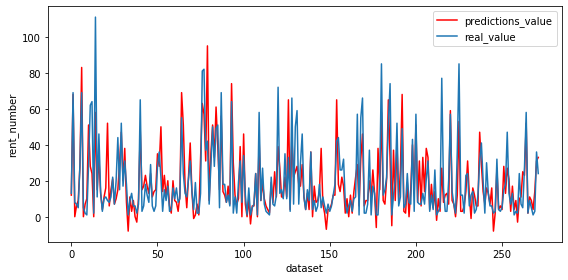

In [69]:
Plot(Nine_xgb_preds,Nine_y_test)

## Error 추가

In [70]:
Nine_data_with_error=AddError(Nine_X_test,Nine_xgb_preds,Nine_y_test,original_y_test_index)
Nine_xlf,Nine_X_train,Nine_X_test,Nine_y_train,Nine_y_test = model_training(Nine_data_with_error,0.3)
original_y_test_index,Nine_xgb_preds = PrintResult(Nine_y_test,Nine_xlf,Nine_X_test)

RMSE:  11.043704751311779
R2 SCORE 0.72


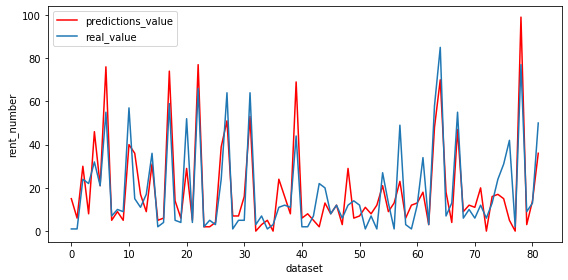

In [71]:
Plot(Nine_xgb_preds,Nine_y_test)